EQUIPO 2

Actividad 5.5 Graficas de comparación con Altair

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from matplotlib import ticker
import numpy as np
import math

import altair as alt

In [3]:
p7 = pd.read_csv("P07_v03_ALL_SESIONS.csv")
p11 = pd.read_csv("P11_v03_ALL_SESION.csv")

In [4]:
p7["time"] = p7.index*3
p11["time"] = p11.index*3
p7

,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,...,F20MH,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,03_D,04_M,time
0,0.191246,0.069119,0.117477,0.256040,0.009921,1.000000,0.000000,0.000000,0.354846,0.445257,...,0.324511,0.144152,0.710069,0.645510,0.412842,-1,-1,-1,-1,0
1,0.227600,0.022417,0.170484,0.269475,0.056222,1.000000,0.000000,0.000000,0.382919,0.440840,...,0.306889,0.157104,0.649362,0.648283,0.412262,-1,-1,-1,-1,3
2,0.197158,0.016593,0.090188,0.256400,0.071611,0.833333,0.250000,0.500000,0.285470,0.423134,...,0.296270,0.162034,0.639515,0.618015,0.398226,-1,-1,-1,-1,6
3,0.142945,0.052955,0.073806,0.157591,0.050316,0.833333,0.500000,0.000000,0.254811,0.534744,...,0.286023,0.187410,0.632932,0.612956,0.383100,-1,-1,-1,-1,9
4,0.139948,0.049105,0.122286,0.138448,0.042417,0.666667,0.500000,0.000000,0.190403,0.563610,...,0.305029,0.213902,0.642250,0.580537,0.356163,-1,-1,-1,-1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9188,0.407020,0.350278,0.579470,0.290449,0.730194,0.190476,0.000000,0.000000,0.269351,0.117915,...,0.341969,0.272908,0.776797,0.274091,0.245180,-1,-1,-1,-1,27564
9189,0.324212,0.552481,0.463448,0.210629,0.642435,0.198413,0.035714,0.058824,0.321959,0.160984,...,0.348980,0.250174,0.773886,0.326970,0.257277,-1,-1,-1,-1,27567
9190,0.128117,0.073647,0.175793,0.096799,0.251388,0.206349,0.035714,0.058824,0.314978,0.177591,...,0.354896,0.202753,0.818124,0.384140,0.317961,-1,-1,-1,-1,27570
9191,0.170067,0.028584,0.277457,0.118724,0.281708,0.214286,0.000000,0.000000,0.287029,0.166591,...,0.388358,0.203535,0.849418,0.437443,0.384135,-1,-1,-1,-1,27573


In [5]:
def distance(x, y, z):
    return math.sqrt(x**2 + y**2 + z**2)

p7['Distancia'] = p7.apply(lambda row: distance(row['Des_x'], row['Des_y'], row['Des_z']), axis=1)
p11['Distancia'] = p11.apply(lambda row: distance(row['Des_x'], row['Des_y'], row['Des_z']), axis=1)

p7['Distancia']

0       0.281879
1       0.323793
2       0.281075
3       0.181146
4       0.189528
          ...   
9188    0.976385
9189    0.819677
9190    0.321666
9191    0.412840
9192    0.441121
Name: Distancia, Length: 9193, dtype: float64

In [6]:
# Filtramos solo las columnas numéricas para estandarizar
numeric_cols = p7.select_dtypes(include=['number']).columns

# Estandarización de las columnas numéricas
scaler = StandardScaler()
my_data_normalized = pd.DataFrame(scaler.fit_transform(p7[numeric_cols]), columns=numeric_cols)

# Contar cruces por cero para cada columna
cross_zero_counts = {}
for col in my_data_normalized.columns:
    # Contar cruces por cero (un cambio de signo entre valores consecutivos)
    cross_zero_counts[col] = ((my_data_normalized[col].shift(1) * my_data_normalized[col]) < 0).sum()

# Convertir el resultado en un DataFrame
df_cross_zero_counts = pd.DataFrame(list(cross_zero_counts.items()), columns=['Column', 'Zero_Crossings'])

# Mostrar el resultado
df_cross_zero_counts

,Column,Zero_Crossings
0,Veloc,1782
1,Acele,2739
2,Des_x,1855
3,Des_y,1848
4,Des_z,1701
5,Presn,723
6,VelPr,1738
7,AcePr,3018
8,F5EEX,1098
9,F6EES,1284


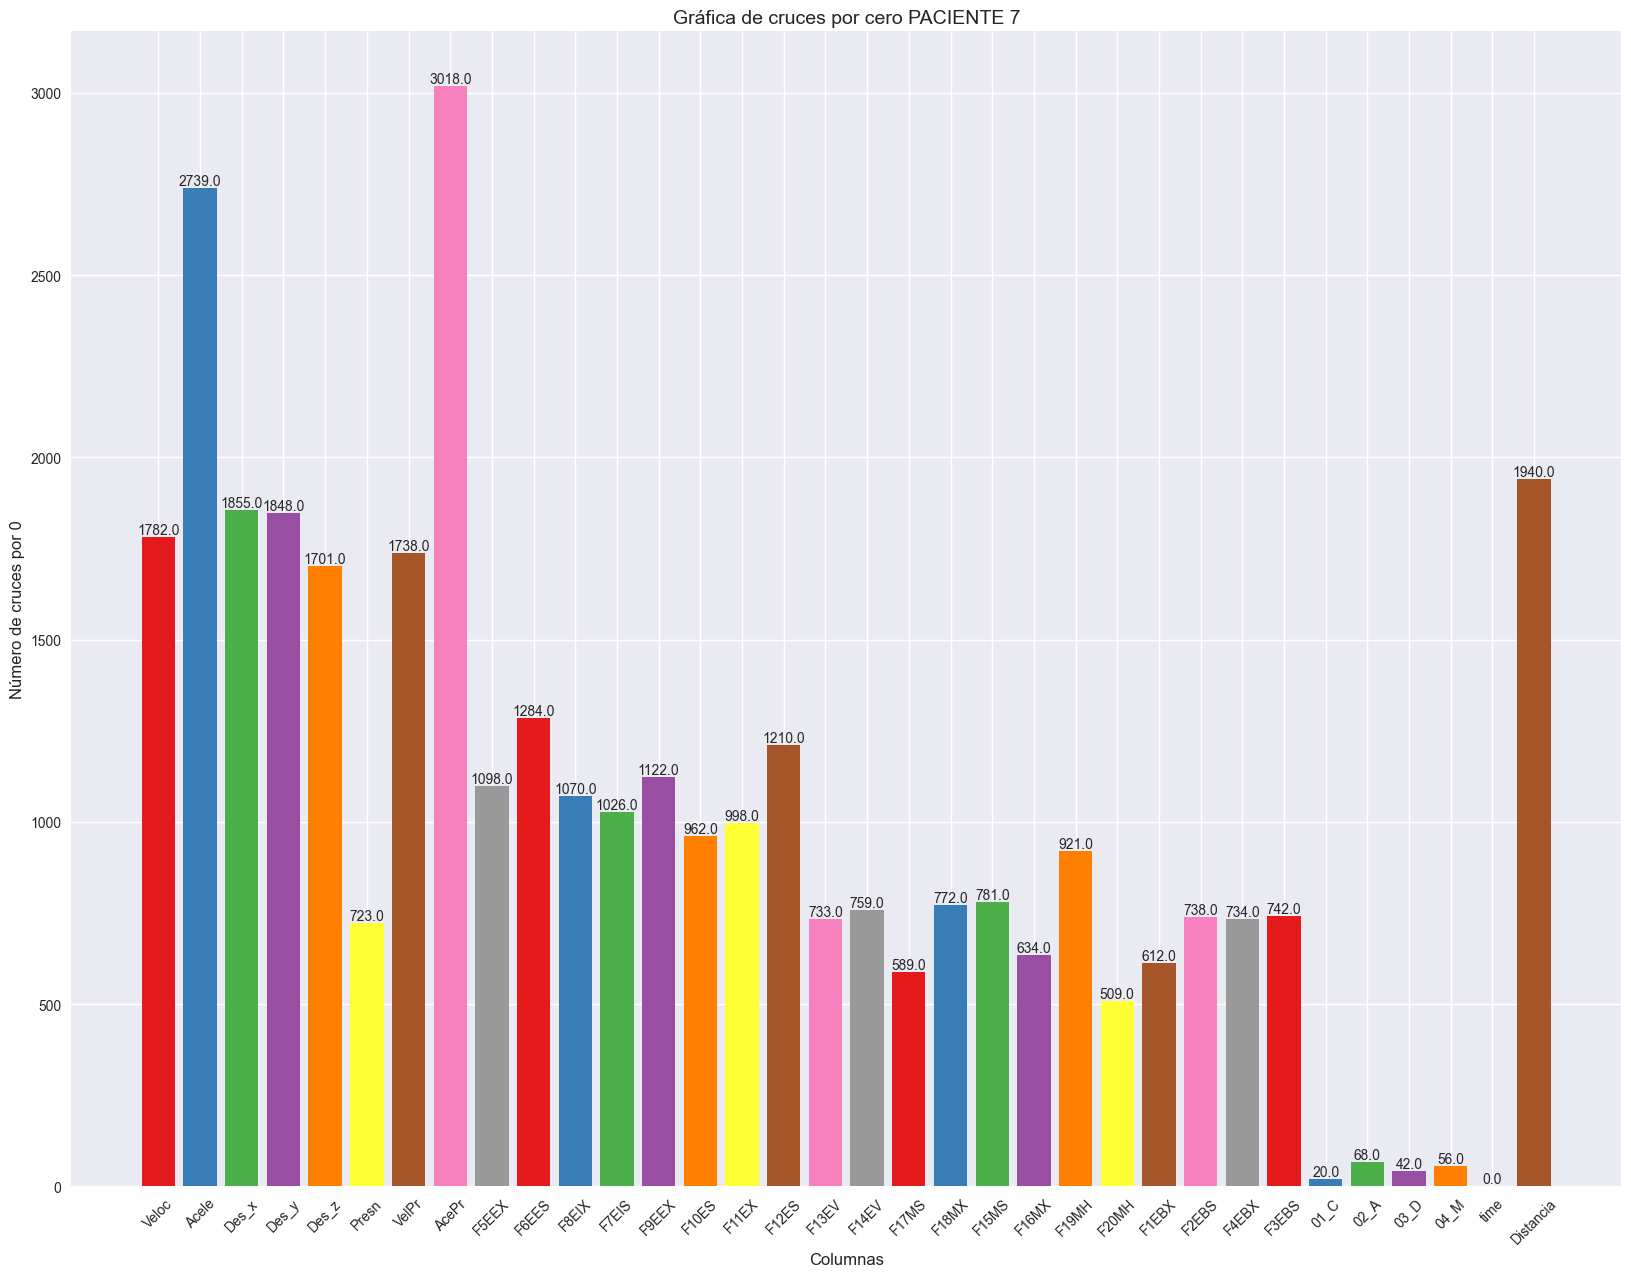

In [7]:
plt.figure(figsize=(20, 15))

# Crear la gráfica de barras
plt.style.use('seaborn-v0_8')
# Gráfica de barras
colors = plt.get_cmap("Set1").colors  # Usamos la paleta Set2 para colores suaves y equilibrados

bars = plt.bar(df_cross_zero_counts['Column'],
               df_cross_zero_counts['Zero_Crossings'],
               color=colors[:len(df_cross_zero_counts)])
# Rotar las etiquetas del eje X
plt.xticks(rotation=45)

# Añadir etiquetas y título
plt.xlabel("Columnas", fontsize=12)
plt.ylabel("Número de cruces por 0", fontsize=12)
plt.title("Gráfica de cruces por cero PACIENTE 7", fontsize=14)

# Mostrar el valor encima de cada barra
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():.1f}',
        ha='center', va='bottom'
    )

plt.show()

In [8]:
# Configurar la gráfica de barras en Altair
chart = alt.Chart(df_cross_zero_counts).mark_bar().encode(
    x=alt.X('Column', sort=None, title='Columnas'),
    y=alt.Y('Zero_Crossings', title='Número de cruces por 0'),
    color=alt.Color('Column', scale=alt.Scale(scheme='set1'))  # Colores de la paleta Set1
).properties(
    title='Gráfica de cruces por cero PACIENTE 7',
    width=600,
    height=400
).configure_axis(
    labelAngle=45  # Rotar etiquetas del eje X
).mark_text(
    align='center',
    baseline='bottom',
    dy=-5  # Ajuste de posición para mostrar encima de la barra
).encode(
    text=alt.Text('Zero_Crossings:Q')
)

chart.display()


alt.Chart(...)

In [28]:
import pandas as pd
import altair as alt

# Supongamos que df_cross_zero_counts es tu DataFrame original
# df_cross_zero_counts = pd.DataFrame({...})

# Definir una lista de 17 colores
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#ffbb78', '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2',
    '#dbdb8d', '#9edae5'
]

# Agrupar columnas en pares y crear etiquetas para la leyenda
labels = []
for i in range(0, len(df_cross_zero_counts) - 1, 2):
    pair_label = f"{df_cross_zero_counts['Column'].iloc[i]} y {df_cross_zero_counts['Column'].iloc[i + 1]}"
    labels.append(pair_label)

# Agregar la última columna como un grupo único
if len(df_cross_zero_counts) % 2 == 1:
    labels.append(df_cross_zero_counts['Column'].iloc[-1])

# Asignar las etiquetas al DataFrame
df_cross_zero_counts['Legend'] = None
for i, label in enumerate(labels):
    if i < len(labels) - 1:  # Asignar el par de nombres
        df_cross_zero_counts.loc[2 * i:2 * i + 1, 'Legend'] = label
    else:  # Asignar la última columna sola
        df_cross_zero_counts.loc[len(df_cross_zero_counts) - 1, 'Legend'] = label

# Crear una nueva columna para los colores
df_cross_zero_counts['Color'] = df_cross_zero_counts['Legend'].factorize()[0]

# Gráfico de barras
bars = alt.Chart(df_cross_zero_counts).mark_bar().encode(
    x=alt.X('Column', sort=None, title='Columnas'),
    y=alt.Y('Zero_Crossings', title='Número de cruces por 0'),
    color=alt.Color('Legend:N', scale=alt.Scale(domain=labels, range=colors[:len(labels)]),
                    legend=alt.Legend(title="Variables (Grupos)", orient='right'))  # Leyenda a la derecha
).properties(
    title='Gráfica de cruces por cero PACIENTE 7',
    width=600,
    height=400
)

# Agregar etiquetas de texto en una capa separada
text = bars.mark_text(
    align='center',
    baseline='bottom',
    dy=-5  # Ajuste para que el texto quede sobre la barra
).encode(
    text='Zero_Crossings:Q'  # Cuantitative (Q), Ordinal (O), Nominal (N), Temporal (T)
)

# Combinar barras y texto
chart = bars + text

# Mostrar el gráfico
chart.display()


alt.LayerChart(...)

/var/folders/zc/0810pbdx27g4bxf79h2cbnf40000gn/T/ipykernel_10392/4046660232.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



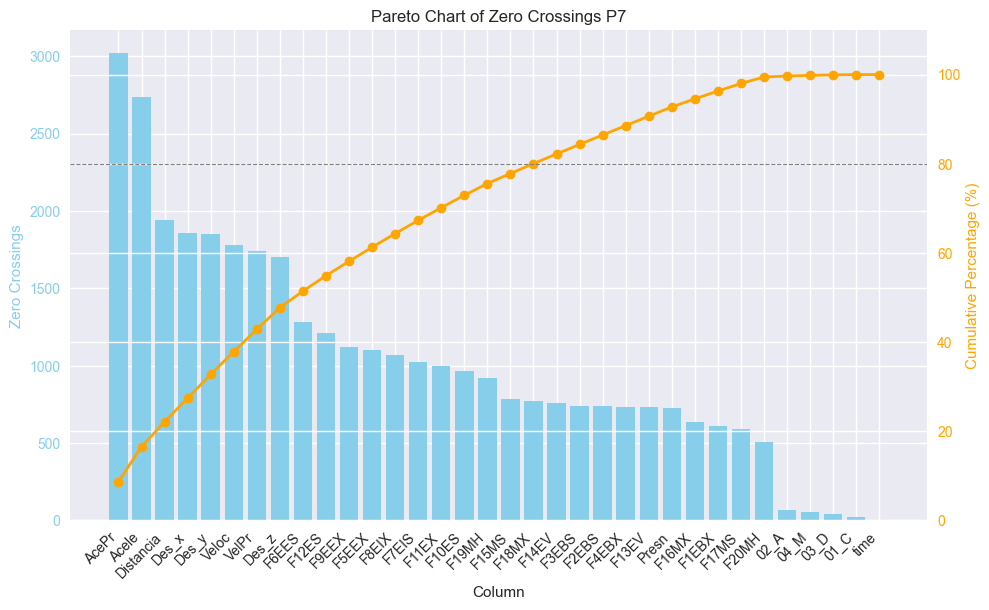

In [29]:
# Ordenar los datos en orden descendente por 'Zero_Crossings'
df_cross_zero_counts_P7 = df_cross_zero_counts.sort_values(by='Zero_Crossings', ascending=False).reset_index(drop=True)

# Calcular el porcentaje acumulativo
df_cross_zero_counts_P7['Cumulative_Percentage'] = df_cross_zero_counts_P7['Zero_Crossings'].cumsum() / df_cross_zero_counts_P7['Zero_Crossings'].sum() * 100

# Crear la gráfica de Pareto
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar las barras de conteo de cruces por cero
bars = ax1.bar(df_cross_zero_counts_P7['Column'], df_cross_zero_counts_P7['Zero_Crossings'], color='skyblue', label='Zero Crossings')
ax1.set_xlabel('Column')
ax1.set_ylabel('Zero Crossings', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Rotar las etiquetas del eje X
ax1.set_xticklabels(df_cross_zero_counts_P7['Column'], rotation=45, ha='right')

# Crear un segundo eje Y para la línea de porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(df_cross_zero_counts_P7['Column'], df_cross_zero_counts_P7['Cumulative_Percentage'], color='orange', marker='o', linestyle='-', linewidth=2, label='Cumulative Percentage')
ax2.set_ylabel('Cumulative Percentage (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_ylim([0, 110])  # Asegura que el límite superior permita que la línea llegue hasta 100%

# Agregar línea de referencia en 80%
ax2.axhline(80, color='grey', linestyle='--', linewidth=0.8)

# Mostrar leyendas
fig.tight_layout()
plt.title('Pareto Chart of Zero Crossings P7')
plt.show()


In [11]:

# Ordenar los datos en orden descendente y calcular el porcentaje acumulativo
df_cross_zero_counts_P7 = df_cross_zero_counts.sort_values(by='Zero_Crossings', ascending=False).reset_index(drop=True)
df_cross_zero_counts_P7['Cumulative_Percentage'] = df_cross_zero_counts_P7['Zero_Crossings'].cumsum() / df_cross_zero_counts_P7['Zero_Crossings'].sum() * 100

df_cross_zero_counts_P7

,Column,Zero_Crossings,Legend,Color,Cumulative_Percentage
0,AcePr,3018,VelPr y AcePr,3,8.666437
1,Acele,2739,Veloc y Acele,0,16.531702
2,Distancia,1940,time y Distancia,16,22.102573
3,Des_x,1855,Des_x y Des_y,1,27.429359
4,Des_y,1848,Des_x y Des_y,1,32.736044
5,Veloc,1782,Veloc y Acele,0,37.853205
6,VelPr,1738,VelPr y AcePr,3,42.844016
7,Des_z,1701,Des_z y Presn,2,47.728578
8,F6EES,1284,F5EEX y F6EES,4,51.415690
9,F12ES,1210,F11EX y F12ES,7,54.890306


In [12]:
# Crear el gráfico de barras
bars = alt.Chart(df_cross_zero_counts_P7).mark_bar(color='skyblue').encode(
    x=alt.X('Column', title='Columnas', sort=None),  # El eje X respeta el orden del DataFrame
    y=alt.Y('Zero_Crossings', title='Zero Crossings')
).properties(
    title="Cruces por cero en orden del índice"
)
# Crear el gráfico de línea para el porcentaje acumulativo
line = alt.Chart(df_cross_zero_counts_P7).mark_line(color='orange').encode(
    x=alt.X('Column', title='Columnas', sort=None),
    y=alt.Y('Cumulative_Percentage', title='Cumulative Percentage (%)')
)

# Puntos en la línea de porcentaje acumulativo
points = alt.Chart(df_cross_zero_counts_P7).mark_point(color='orange').encode(
    x=alt.X('Column', title='Columnas', sort=None),
    y='Cumulative_Percentage'
)

# Línea de referencia en el 80%
rule = alt.Chart(pd.DataFrame({'Cumulative_Percentage': [80]})).mark_rule(color='grey', strokeDash=[5,5]).encode(
    y='Cumulative_Percentage'
)

# Combinar los gráficos
pareto_chart = (bars + line + points + rule).properties(
    title='Pareto Chart of Zero Crossings P7',
    width=600,
    height=400
)

pareto_chart.display()




alt.LayerChart(...)

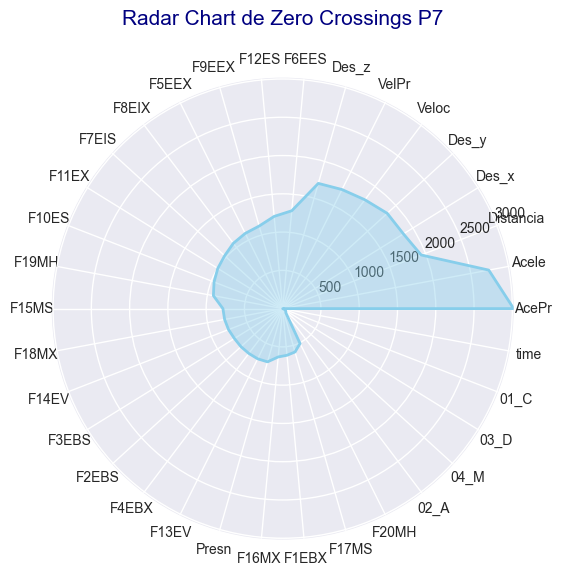

In [13]:
# Número de variables/categorías
num_vars = len(df_cross_zero_counts_P7)

# Ángulos de cada categoría en el radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Repetimos el primer valor al final para cerrar el gráfico
values_p7 = df_cross_zero_counts_P7['Zero_Crossings'].tolist()
values_p7 += values_p7[:1]
angles += angles[:1]

# Inicializar el gráfico en coordenadas polares
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Dibujar la línea del gráfico
ax.plot(angles, values_p7, color='skyblue', linewidth=2, linestyle='solid')

# Rellenar el área
ax.fill(angles, values_p7, color='skyblue', alpha=0.4)

# Añadir etiquetas para cada categoría
ax.set_xticks(angles[:-1])
ax.set_xticklabels(df_cross_zero_counts_P7['Column'])

# Ajustar los límites del eje radial y el título
ax.set_ylim(0, max(values_p7))
plt.title('Radar Chart de Zero Crossings P7', size=15, color='navy', pad=20)

plt.show()


In [14]:
import plotly.graph_objects as go

# Asegúrate de cerrar el ciclo tanto en las etiquetas como en los valores para que el gráfico de radar sea completo.
categories = df_cross_zero_counts_P7['Column'].tolist()
values_p7 = df_cross_zero_counts_P7['Zero_Crossings'].tolist()

# Añadir el primer valor al final de la lista para cerrar el gráfico
categories += [categories[0]]
values_p7 += [values_p7[0]]

fig = go.Figure(data=go.Scatterpolar(
    r=values_p7,
    theta=categories,
    fill='toself',
    name='Zero Crossings'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(values_p7) * 1.1]  # Ajusta el rango radial un poco por encima del valor máximo
        )
    ),
    showlegend=False,
    title='Gráfico de Radar - Zero Crossings por Column P7'
)

fig.show()


In [15]:
# Filtramos solo las columnas numéricas para estandarizar
numeric_cols_P11 = p11.select_dtypes(include=['number']).columns

# Estandarización de las columnas numéricas
scaler = StandardScaler()
my_data_normalized_P11 = pd.DataFrame(scaler.fit_transform(p11[numeric_cols_P11]), columns=numeric_cols_P11)

# Contar cruces por cero para cada columna
cross_zero_counts = {}
for col in my_data_normalized_P11.columns:
    # Contar cruces por cero (un cambio de signo entre valores consecutivos)
    cross_zero_counts[col] = ((my_data_normalized_P11[col].shift(1) * my_data_normalized_P11[col]) < 0).sum()

# Convertir el resultado en un DataFrame
df_cross_zero_counts_P11 = pd.DataFrame(list(cross_zero_counts.items()), columns=['Column', 'Zero_Crossings'])

# Mostrar el resultado
df_cross_zero_counts_P11

,Column,Zero_Crossings
0,Veloc,2825
1,Acele,4028
2,Des_x,3451
3,Des_y,2845
4,Des_z,2043
5,Presn,3134
6,VelPr,2634
7,AcePr,4630
8,F5EEX,1700
9,F6EES,1694


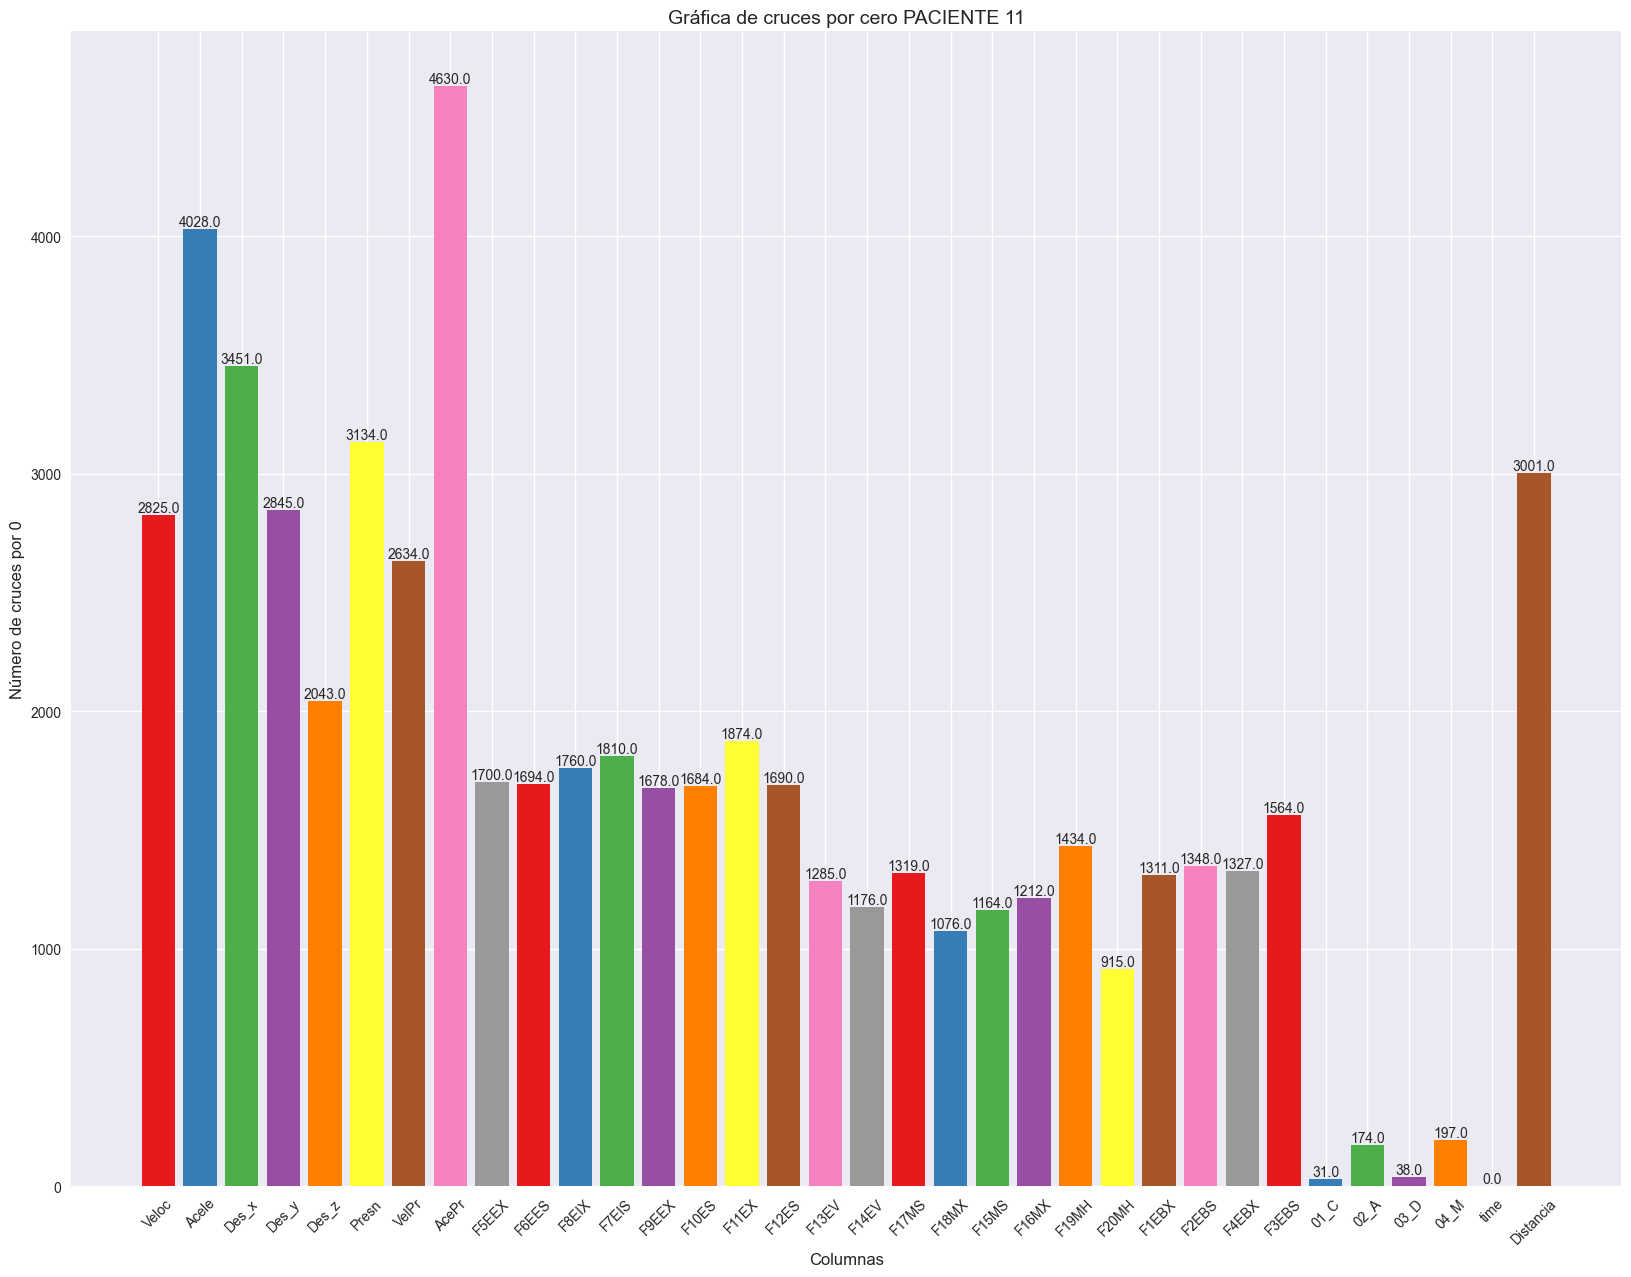

In [16]:
plt.figure(figsize=(20, 15))

# Crear la gráfica de barras
plt.style.use('seaborn-v0_8')
# Gráfica de barras
colors = plt.get_cmap("Set1").colors  # Usamos la paleta Set2 para colores suaves y equilibrados

bars_P11 = plt.bar(df_cross_zero_counts_P11['Column'],
               df_cross_zero_counts_P11['Zero_Crossings'],
               color=colors[:len(df_cross_zero_counts_P11)])
# Rotar las etiquetas del eje X
plt.xticks(rotation=45)

# Añadir etiquetas y título
plt.xlabel("Columnas", fontsize=12)
plt.ylabel("Número de cruces por 0", fontsize=12)
plt.title("Gráfica de cruces por cero PACIENTE 11", fontsize=14)

# Mostrar el valor encima de cada barra
for bar in bars_P11:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():.1f}',
        ha='center', va='bottom'
    )

plt.show()

In [17]:
# Configurar la gráfica de barras en Altair
chart_P11 = alt.Chart(df_cross_zero_counts_P11).mark_bar().encode(
    x=alt.X('Column', sort=None, title='Columnas'),
    y=alt.Y('Zero_Crossings', title='Número de cruces por 0'),
    color=alt.Color('Column', scale=alt.Scale(scheme='set1'))  # Colores de la paleta Set1
).properties(
    title='Gráfica de cruces por cero PACIENTE 11',
    width=600,
    height=400
).configure_axis(
    labelAngle=45  # Rotar etiquetas del eje X
).mark_text(
    align='center',
    baseline='bottom',
    dy=-5  # Ajuste de posición para mostrar encima de la barra
).encode(
    text=alt.Text('Zero_Crossings:Q')
)

chart_P11.display()


alt.Chart(...)

In [18]:
import pandas as pd
import altair as alt

# Supongamos que df_cross_zero_counts es tu DataFrame original
# df_cross_zero_counts = pd.DataFrame({...})

# Definir una lista de 17 colores
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#ffbb78', '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2',
    '#dbdb8d', '#9edae5'
]

# Agrupar columnas en pares y crear etiquetas para la leyenda
labels = []
for i in range(0, len(df_cross_zero_counts_P11) - 1, 2):
    pair_label = f"{df_cross_zero_counts_P11['Column'].iloc[i]} y {df_cross_zero_counts_P11['Column'].iloc[i + 1]}"
    labels.append(pair_label)

# Agregar la última columna como un grupo único
if len(df_cross_zero_counts_P11) % 2 == 1:
    labels.append(df_cross_zero_counts_P11['Column'].iloc[-1])

# Asignar las etiquetas al DataFrame
df_cross_zero_counts_P11['Legend'] = None
for i, label in enumerate(labels):
    if i < len(labels) - 1:  # Asignar el par de nombres
        df_cross_zero_counts_P11.loc[2 * i:2 * i + 1, 'Legend'] = label
    else:  # Asignar la última columna sola
        df_cross_zero_counts_P11.loc[len(df_cross_zero_counts_P11) - 1, 'Legend'] = label

# Crear una nueva columna para los colores
df_cross_zero_counts_P11['Color'] = df_cross_zero_counts_P11['Legend'].factorize()[0]

# Gráfico de barras
bars_P11 = alt.Chart(df_cross_zero_counts_P11).mark_bar().encode(
    x=alt.X('Column', sort=None, title='Columnas'),
    y=alt.Y('Zero_Crossings', title='Número de cruces por 0'),
    color=alt.Color('Legend:N', scale=alt.Scale(domain=labels, range=colors[:len(labels)]),
                    legend=alt.Legend(title="Variables (Grupos)", orient='right'))  # Leyenda a la derecha
).properties(
    title='Gráfica de cruces por cero PACIENTE 11',
    width=600,
    height=400
)

# Agregar etiquetas de texto en una capa separada
text = bars_P11.mark_text(
    align='center',
    baseline='bottom',
    dy=-5  # Ajuste para que el texto quede sobre la barra
).encode(
    text='Zero_Crossings:Q'  # Cuantitative (Q), Ordinal (O), Nominal (N), Temporal (T)
)

# Combinar barras y texto
chart_P11 = bars_P11 + text

# Mostrar el gráfico
chart_P11.display()

alt.LayerChart(...)

/var/folders/zc/0810pbdx27g4bxf79h2cbnf40000gn/T/ipykernel_10392/1591041453.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



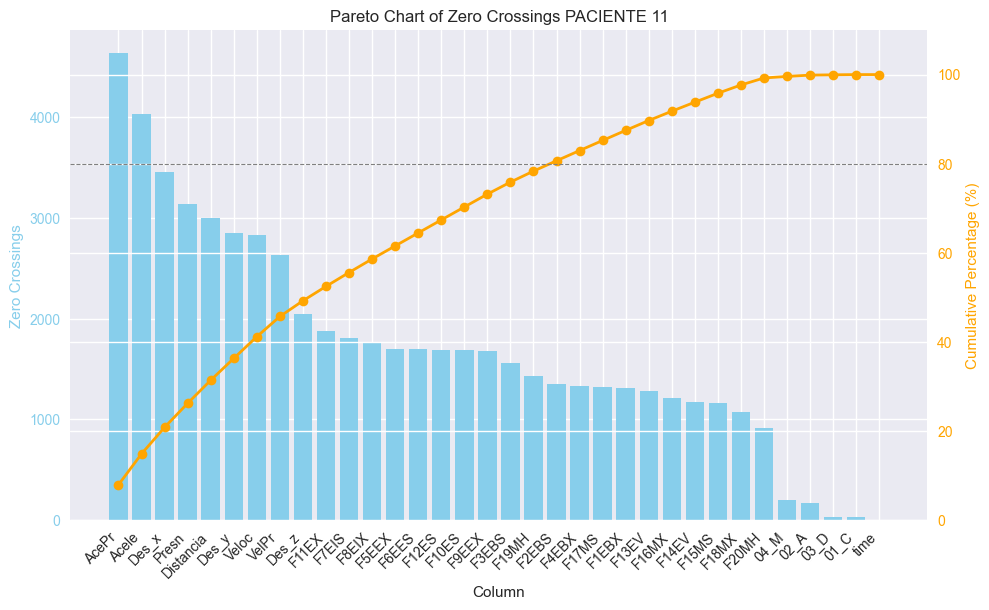

In [19]:
# Ordenar los datos en orden descendente por 'Zero_Crossings'
df_cross_zero_counts_P11 = df_cross_zero_counts_P11.sort_values(by='Zero_Crossings', ascending=False).reset_index(drop=True)

# Calcular el porcentaje acumulativo
df_cross_zero_counts_P11['Cumulative_Percentage'] = df_cross_zero_counts_P11['Zero_Crossings'].cumsum() / df_cross_zero_counts_P11['Zero_Crossings'].sum() * 100

# Crear la gráfica de Pareto
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar las barras de conteo de cruces por cero
bars_P11 = ax1.bar(df_cross_zero_counts_P11['Column'], df_cross_zero_counts_P11['Zero_Crossings'], color='skyblue', label='Zero Crossings')
ax1.set_xlabel('Column')
ax1.set_ylabel('Zero Crossings', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Rotar las etiquetas del eje X
ax1.set_xticklabels(df_cross_zero_counts_P11['Column'], rotation=45, ha='right')

# Crear un segundo eje Y para la línea de porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(df_cross_zero_counts_P11['Column'], df_cross_zero_counts_P11['Cumulative_Percentage'], color='orange', marker='o', linestyle='-', linewidth=2, label='Cumulative Percentage')
ax2.set_ylabel('Cumulative Percentage (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_ylim([0, 110])  # Asegura que el límite superior permita que la línea llegue hasta 100%

# Agregar línea de referencia en 80%
ax2.axhline(80, color='grey', linestyle='--', linewidth=0.8)

# Mostrar leyendas
fig.tight_layout()
plt.title('Pareto Chart of Zero Crossings PACIENTE 11')
plt.show()

In [20]:

# Ordenar los datos en orden descendente y calcular el porcentaje acumulativo
df_cross_zero_counts_P11 = df_cross_zero_counts_P11.sort_values(by='Zero_Crossings', ascending=False).reset_index(drop=True)
df_cross_zero_counts_P11['Cumulative_Percentage'] = df_cross_zero_counts_P11['Zero_Crossings'].cumsum() / df_cross_zero_counts_P11['Zero_Crossings'].sum() * 100

df_cross_zero_counts_P11

,Column,Zero_Crossings,Legend,Color,Cumulative_Percentage
0,AcePr,4630,VelPr y AcePr,3,7.975608
1,Acele,4028,Veloc y Acele,0,14.914215
2,Des_x,3451,Des_x y Des_y,1,20.858885
3,Presn,3134,Des_z y Presn,2,26.257493
4,Distancia,3001,time y Distancia,16,31.426996
5,Des_y,2845,Des_x y Des_y,1,36.327775
6,Veloc,2825,Veloc y Acele,0,41.194102
7,VelPr,2634,VelPr y AcePr,3,45.731413
8,Des_z,2043,Des_z y Presn,2,49.250672
9,F11EX,1874,F11EX y F12ES,7,52.478812


In [21]:
# Crear el gráfico de barras
bars_P11 = alt.Chart(df_cross_zero_counts_P11).mark_bar(color='skyblue').encode(
    x=alt.X('Column', title='Columnas', sort=None),  # El eje X respeta el orden del DataFrame
    y=alt.Y('Zero_Crossings', title='Zero Crossings')
).properties(
    title="Cruces por cero en orden del índice"
)
# Crear el gráfico de línea para el porcentaje acumulativo
line = alt.Chart(df_cross_zero_counts_P11).mark_line(color='orange').encode(
    x=alt.X('Column', title='Columnas', sort=None),
    y=alt.Y('Cumulative_Percentage', title='Cumulative Percentage (%)')
)

# Puntos en la línea de porcentaje acumulativo
points = alt.Chart(df_cross_zero_counts_P11).mark_point(color='orange').encode(
    x=alt.X('Column', title='Columnas', sort=None),
    y='Cumulative_Percentage'
)

# Línea de referencia en el 80%
rule = alt.Chart(pd.DataFrame({'Cumulative_Percentage': [80]})).mark_rule(color='grey', strokeDash=[5,5]).encode(
    y='Cumulative_Percentage'
)

# Combinar los gráficos
pareto_chart = (bars_P11 + line + points + rule).properties(
    title='Pareto Chart of Zero Crossings PACIENTE 11',
    width=600,
    height=400
)

pareto_chart.display()

alt.LayerChart(...)

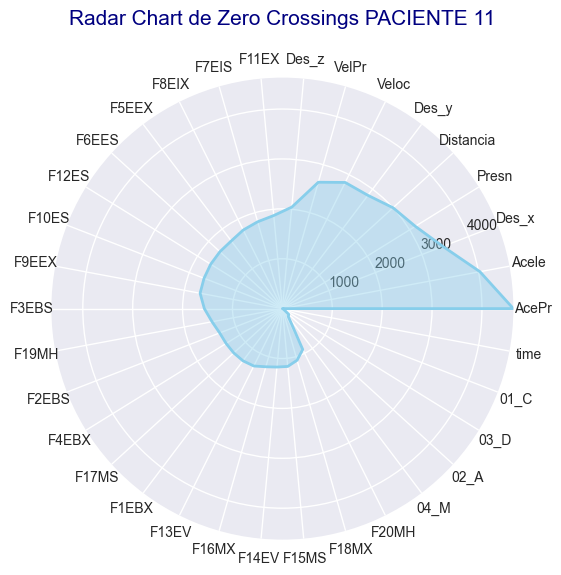

In [22]:
# Número de variables/categorías
num_vars = len(df_cross_zero_counts_P11)

# Ángulos de cada categoría en el radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Repetimos el primer valor al final para cerrar el gráfico
values_p11 = df_cross_zero_counts_P11['Zero_Crossings'].tolist()
values_p11 += values_p11[:1]
angles += angles[:1]

# Inicializar el gráfico en coordenadas polares
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Dibujar la línea del gráfico
ax.plot(angles, values_p11, color='skyblue', linewidth=2, linestyle='solid')

# Rellenar el área
ax.fill(angles, values_p11, color='skyblue', alpha=0.4)

# Añadir etiquetas para cada categoría
ax.set_xticks(angles[:-1])
ax.set_xticklabels(df_cross_zero_counts_P11['Column'])

# Ajustar los límites del eje radial y el título
ax.set_ylim(0, max(values_p11))
plt.title('Radar Chart de Zero Crossings PACIENTE 11', size=15, color='navy', pad=20)

plt.show()

In [23]:
import plotly.graph_objects as go

# Asegúrate de cerrar el ciclo tanto en las etiquetas como en los valores para que el gráfico de radar sea completo.
categories = df_cross_zero_counts_P11['Column'].tolist()
values_p11 = df_cross_zero_counts_P11['Zero_Crossings'].tolist()

# Añadir el primer valor al final de la lista para cerrar el gráfico
categories += [categories[0]]
values_p11 += [values_p11[0]]

fig = go.Figure(data=go.Scatterpolar(
    r=values_p11,
    theta=categories,
    fill='toself',
    name='Zero Crossings'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(values_p11) * 1.1]  # Ajusta el rango radial un poco por encima del valor máximo
        )
    ),
    showlegend=False,
    title='Gráfico de Radar - Zero Crossings por Column PACIENTE 11'
)

fig.show()


In [ ]:
%%shell
jupyter nbconvert --to html actividad_5_4_P7.ipynb

UsageError: Cell magic `%%shell` not found.


In [27]:
df_cross_zero_counts_P11

Index(['Column', 'Zero_Crossings', 'Legend', 'Color', 'Cumulative_Percentage'], dtype='object')

In [25]:
%%shell
jupyter nbconvert --to html actividad_5_4_P7.ipynb

UsageError: Cell magic `%%shell` not found.
